# **Campaign Plan for 2017**

## **Introduction**

The project aims to assist the Ice company in understanding historical video game sales, enabling them to formulate an improved sales strategy for the year 2017.

**Goal**

The objectives of this project are outlined below.

1. Identifying patterns that determine whether a game can be deemed successful or not.
2. Discovering the most promising games and planning their advertising campaigns.

**Stages**

The project's phases are outlined below.

1. Open the data file and study its general information.

2. Prepare the data.

- Rename the column (use lowercase letters for all).
- Convert the data to the required data type.
- Describe which columns have had their data types changed and explain the reasons.
- If necessary, missing values will be handled
- Calculate the total sales (sales quantity across all regions) for each game and input these values into a separate column.

3. Analyze the data.

- Examine the quantity of games released in different years.
- Analyze how sales vary from one platform to another. Select the platform with the highest total sales and create its distribution based on yearly data. Identify platforms that were popular in the past but now have no sales. How long does it usually take for a new platform to emerge and for an old platform to lose popularity?
- Determine the data collection period.
- Which platforms have the highest sales? Which platforms are growing or shrinking? Choose several potentially profitable platforms.
- Generate a box plot for the global sales of all games grouped by platform. Are the sales differences significant? How about the average sales across different platforms?
- Investigate how user and professional reviews impact sales on a popular platform. Create a scatter plot and calculate the correlation between reviews and sales. Then, draw conclusions.
- Compare the sales of the same game on different platforms.
- Observe the general distribution of games based on genre. What conclusions can we draw regarding the most profitable genres?

4. Perform user profiling for each region.


For each region (NA, EU, JP), ascertain:

- The top 5 platforms. Explain the market share variations from one region to another.
- The top 5 genres. Elucidate their differences.
- Does the ESRB rating influence sales in each region?

5. Test hypotheses.

- The average user rating of the Xbox One and PC platforms is the same.
- The average user rating of the Action and Sports genres is different.

6. Conclusions drawing.

**Content of Data**

The data consist of these contents:

- Name
- Platform
- Year_of_Release
- Genre
- NA_sales (sales in North America in millions of USD)
- EU_sales (sales in Europe in millions of USD)
- JP_sales (sales in Japan in millions of USD)
- Other_sales (sales in other countries in millions of USD)
- Critic_Score (review score from critics, maximum 100)
- User_Score (review score from users, maximum 10)
- Rating (ESRB)

Note: Data for the year 2016 may be incomplete.

## **Data Preparation and Processing**

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from scipy.stats import ttest_ind
import scipy.stats as stats

In [75]:
data = pd.read_csv('/content/games.csv')

In [76]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [77]:
data.shape

(16715, 11)

In [78]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [80]:
data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [81]:
(data.isnull().sum() / len(data) * 100).sort_values()

Platform            0.000000
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Name                0.011965
Genre               0.011965
Year_of_Release     1.609333
User_Score         40.089740
Rating             40.478612
Critic_Score       51.319174
dtype: float64

In [82]:
data.describe().round(2)

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


In [83]:
data.duplicated().sum()

0

Based on data given, it is concluded:

1. The data has 16715 rows and 11 columns.
2. The name columns are in capital.
3. There are two type of data that is not suitable. They are Year_of_Release and User_Score that should be in integer.
4. Missing value has been found in column: Name, Genre, Year_of_Release, User_Score, Rating, and Critic_Score.
5. There is no duplicate value.

From the findings above, several actions might be needed:

1. Change the name of the columns into lower case format.
2. Change the data type into its suitable type.
3. Deal with missing value with suitable action.
    
    

## **Data Preparation**

### **Set column name into lower case**

In [84]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [85]:
data.columns = ['name',
                'platform',
                'year_of_release',
                'genre',
                'na_sales',
                'eu_sales',
                'jp_sales',
                'other_sales',
                'critic_score',
                'user_score',
                'rating']

In [86]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### **Change the unfit type of data**

**Year of release**

In [87]:
(data['year_of_release'].isnull().sum() / len(data) * 100)

1.609332934489979

We will input 0 for missing value in year_of_release columns since its only 1.6%

In [88]:
data['year_of_release'].fillna(0, inplace=True)
data['year_of_release'].isnull().sum()

0

Since missing value already filled, the change the data type

In [89]:
data['year_of_release'] = data['year_of_release'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


**Critic Score**

In [90]:
(data['critic_score'].isnull().sum() / len(data) * 100)

51.31917439425665

As we can see 51% of critic score is missing its value

In [91]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [92]:
data['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

Because the missing value is to much, so drop the missing value wont be an option. For now we can fill it with 0 first.

In [93]:
data['critic_score'].fillna(0, inplace=True)
data['critic_score'].unique()

array([76.,  0., 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [94]:
data['critic_score'].isnull().sum()

0

In [95]:
data['critic_score'] = data['critic_score'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  int64  
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 1.4+ MB


### **Handling missing value**

**Name and Genre**

In [96]:
(data.isnull().sum() / len(data) * 100).sort_values()

platform            0.000000
year_of_release     0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score        0.000000
name                0.011965
genre               0.011965
user_score         40.089740
rating             40.478612
dtype: float64

Since  its only 0.01% missing value in name and genre, we can drop them all altogether

In [97]:
data.dropna(subset=['name'], inplace=True)
data.dropna(subset=['genre'], inplace=True)


In [98]:
(data.isnull().sum() / len(data) * 100).sort_values()

name                0.000000
platform            0.000000
year_of_release     0.000000
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score        0.000000
user_score         40.082570
rating             40.471489
dtype: float64

**User Score**

In [99]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [100]:
data['user_score'].describe()

count     10014
unique       96
top         tbd
freq       2424
Name: user_score, dtype: object

There is TBD value in column user_score, since TBD means to be determined which is still Nan, we can assume that the value is the same with nan.

In [101]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)

In [102]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [103]:
data['user_score'].describe()

count     7590
unique      95
top        7.8
freq       324
Name: user_score, dtype: object

In [104]:
(data['user_score'].isnull().sum() / len(data) * 100)

54.58625022437623

For now we can leave it this way

In [105]:
data['user_score'] = data['user_score'].astype(float)

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


**Rating**

In [107]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Since the data has missing value in column rating, it is make sense to fill it with unknown for future analysis (filter).

In [108]:
data['rating'].fillna('Unknown', inplace=True)

In [109]:
data['rating'].unique()

array(['E', 'Unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

**Checking**

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [111]:
(data.isnull().sum() / len(data) * 100)

name                0.00000
platform            0.00000
year_of_release     0.00000
genre               0.00000
na_sales            0.00000
eu_sales            0.00000
jp_sales            0.00000
other_sales         0.00000
critic_score        0.00000
user_score         54.58625
rating              0.00000
dtype: float64

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [113]:
data.shape

(16713, 11)

Summary

1. All columns has been set into lower case.
2. Data type has been set as below:

- name : object
- platform : object
- year_of_release : integer
- genre : object
- na_sales : float
- eu_sales : float
- jp_sales : float
- other_sales : float
- critic_score : integer
- user_score : float
- rating : object

3. Missing value in column name and genre has been eliminated.
4. Missing value in user_score still Nan 54%, this need further analysis.
5. Missing value in rating score filled with "Unknown" value.
6. Final data consist of 16713 rows and 11 columns.

## **Exloratory Data Analysis**

In [114]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,NaN,Unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,NaN,Unknown


Adding column total_sales for further analysis

In [115]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [116]:
data.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,NaN,Unknown,40.24


### **Examine the quantity of games released in different years**

In [117]:
data_1 = pd.pivot_table(data, index='year_of_release', values='name', aggfunc='count').reset_index()

In [118]:
data_1.head(2)

,year_of_release,name
0,0,269
1,1980,9


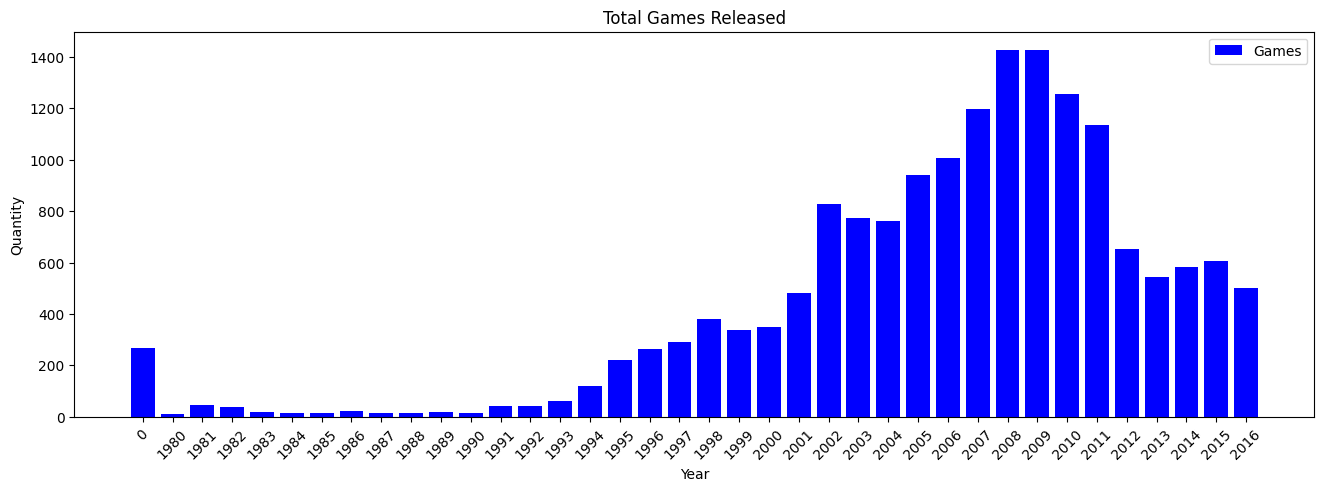

In [119]:
plt.figure(figsize=(16,5))
plt.bar(data_1.index, data_1['name'], label='Games', color='blue')
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.title('Total Games Released')
plt.xticks(data_1.index, data_1['year_of_release'], rotation=45)
plt.legend()
plt.show()

Insight

From calculation above, it shows that the peak of games released were at 2008 and 2009 period.

### **Analyze how sales vary from one platform to another**

In [120]:
data_2 = pd.pivot_table(data, index='platform', values='name', aggfunc='count').sort_values(by='name', ascending=False).reset_index()


In [121]:
data_2.head(2)

,platform,name
0,PS2,2161
1,DS,2151


In [122]:
data_3 = data.loc[data['platform'] == 'PS2']
data_4 = pd.pivot_table(data_3, index='year_of_release', values='total_sales', aggfunc='sum').reset_index()
data_4.head(2)

,year_of_release,total_sales
0,0,22.21
1,2000,39.17


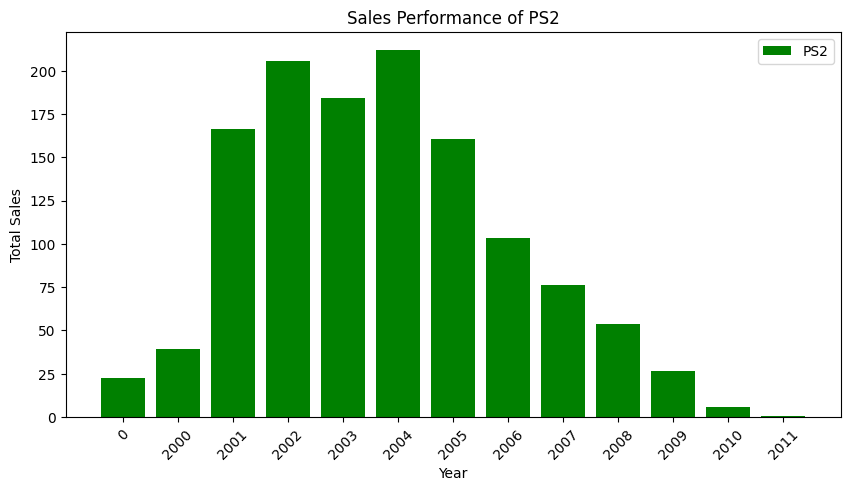

In [123]:
plt.figure(figsize=(10,5))
plt.bar(data_4.index, data_4['total_sales'], label='PS2', color='green')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Sales Performance of PS2')
plt.xticks(data_4.index, data_4['year_of_release'], rotation=45)
plt.legend()
plt.show()

In [124]:
data_4['total_sales'].describe()

count     13.000000
mean      96.597692
std       79.242573
min        0.450000
25%       26.400000
50%       75.990000
75%      166.430000
max      211.810000
Name: total_sales, dtype: float64

Based on the calculation of PS2 as sample, the uphill trend of PS2 Sales started in 2001, peaked at 211 million USD in 2004 and steadily decline after that.

### **Determine the data collection period**

Since the goal of the project is to help Sales division for upcoming year of 2017. This project will observe the 2 year prior which are 2016 and 2015.

In [125]:
main_data = data.loc[data['year_of_release'] > 2014].reset_index()

In [126]:
main_data.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,NaN,Unknown,14.63
1,77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
2,87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,0,NaN,Unknown,7.98
3,94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
4,99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,0,NaN,Unknown,7.39


In [127]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            1108 non-null   int64  
 1   name             1108 non-null   object 
 2   platform         1108 non-null   object 
 3   year_of_release  1108 non-null   int64  
 4   genre            1108 non-null   object 
 5   na_sales         1108 non-null   float64
 6   eu_sales         1108 non-null   float64
 7   jp_sales         1108 non-null   float64
 8   other_sales      1108 non-null   float64
 9   critic_score     1108 non-null   int64  
 10  user_score       559 non-null    float64
 11  rating           1108 non-null   object 
 12  total_sales      1108 non-null   float64
dtypes: float64(6), int64(3), object(4)
memory usage: 112.7+ KB


### **Which platforms have the highest sales? Which platforms are growing or shrinking?**

In [128]:
main_data_1 = pd.pivot_table(main_data, index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index()

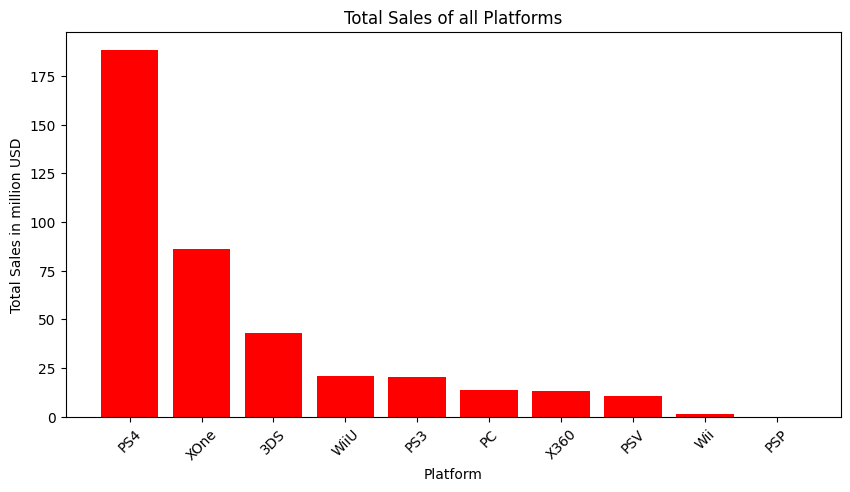

In [129]:
plt.figure(figsize=(10,5))
plt.bar(main_data_1.index, main_data_1['total_sales'], color='red')
plt.xlabel('Platform')
plt.ylabel('Total Sales in million USD')
plt.title('Total Sales of all Platforms')
plt.xticks(main_data_1.index, main_data_1['platform'], rotation=45)
plt.show()

In [130]:
main_data_2 = data.loc[data['year_of_release'] > 2009]

In [131]:
main_data_3 = pd.pivot_table(main_data_2, index=['platform', 'year_of_release'],
                             values='total_sales', aggfunc='sum').reset_index()
main_data_3

,platform,year_of_release,total_sales
0,3DS,2011,63.20
1,3DS,2012,51.36
2,3DS,2013,56.57
3,3DS,2014,43.76
4,3DS,2015,27.78
...,...,...,...
60,X360,2016,1.52
61,XOne,2013,18.96
62,XOne,2014,54.07
63,XOne,2015,60.14


In [132]:
ps_4 = main_data_3.loc[main_data_3['platform'] == 'PS4']
x_one = main_data_3.loc[main_data_3['platform'] == 'XOne']
ds_3 = main_data_3.loc[main_data_3['platform'] == '3DS']
wii_u = main_data_3.loc[main_data_3['platform'] == 'WiiU']
ps_3 = main_data_3.loc[main_data_3['platform'] == 'PS3']
pc = main_data_3.loc[main_data_3['platform'] == 'PC']
x_360 = main_data_3.loc[main_data_3['platform'] == 'X360']
psv = main_data_3.loc[main_data_3['platform'] == 'PSV']
wii = main_data_3.loc[main_data_3['platform'] == 'Wii']
psp = main_data_3.loc[main_data_3['platform'] == 'PSP']

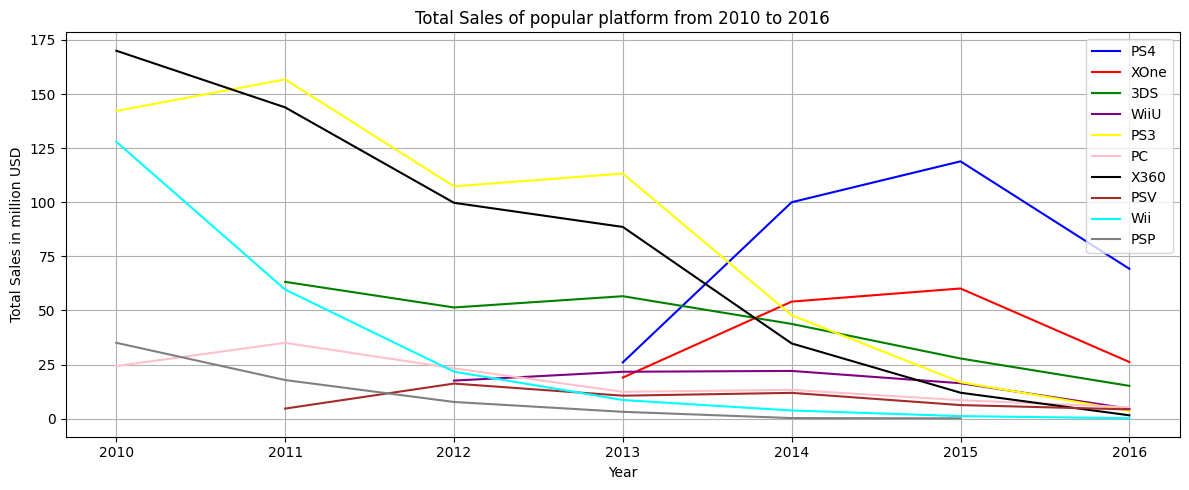

In [133]:
plt.figure(figsize=(12,5))
plt.plot(ps_4['year_of_release'], ps_4['total_sales'], label='PS4', color='blue')
plt.plot(x_one['year_of_release'], x_one['total_sales'], label='XOne', color='red')
plt.plot(ds_3['year_of_release'], ds_3['total_sales'], label='3DS', color='green')
plt.plot(wii_u['year_of_release'], wii_u['total_sales'], label='WiiU', color='purple')
plt.plot(ps_3['year_of_release'], ps_3['total_sales'], label='PS3', color='yellow')
plt.plot(pc['year_of_release'], pc['total_sales'], label='PC', color='pink')
plt.plot(x_360['year_of_release'], x_360['total_sales'], label='X360', color='black')
plt.plot(psv['year_of_release'], psv['total_sales'], label='PSV', color='brown')
plt.plot(wii['year_of_release'], wii['total_sales'], label='Wii', color='cyan')
plt.plot(psp['year_of_release'], psp['total_sales'], label='PSP', color='grey')
plt.xlabel('Year')
plt.ylabel('Total Sales in million USD')
plt.title('Total Sales of popular platform from 2010 to 2016')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

Insight

1. The downfall trend in 2016 caused by incomplete data in 2016 because the year of 2016 is not over yet.
2. Based on the line graph almost all of the platform selling performance are declining but PS4 and Xbox One.

### **Generate a box plot for the global sales of all games grouped by platform**

The data using in this chapter is sales of games within the year of 2015 and 2016 only.

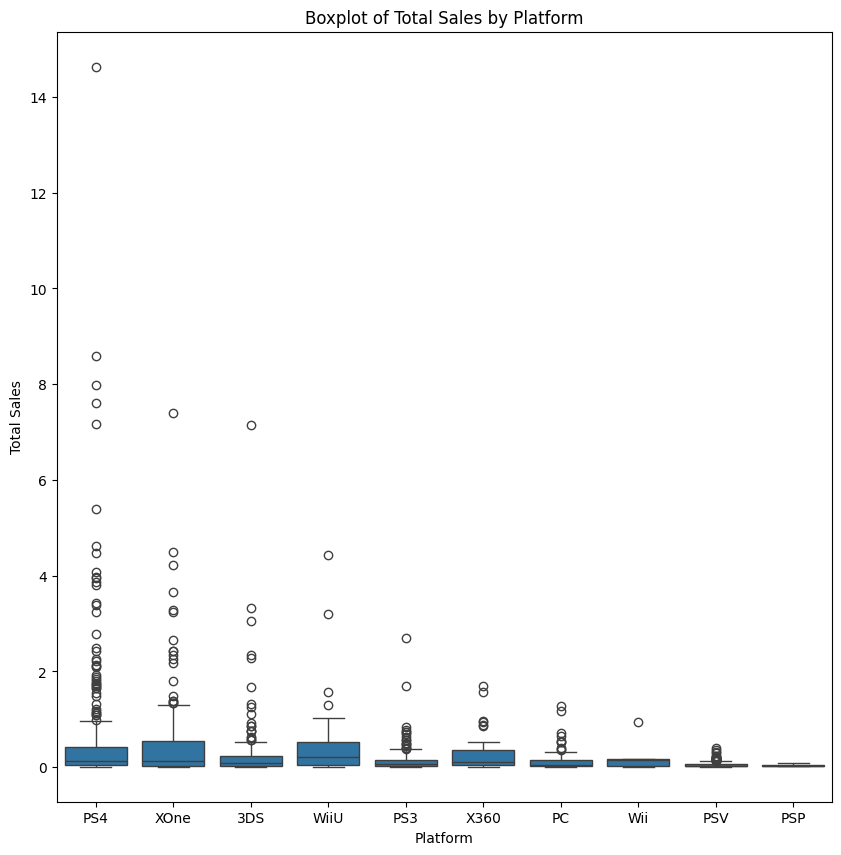

In [134]:
plt.figure(figsize=(10,10))
sns.boxplot(x='platform', y='total_sales', data=main_data)
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.title('Boxplot of Total Sales by Platform')
plt.show()

In [135]:
data_6 = pd.pivot_table(main_data, index='platform', values='total_sales', aggfunc='mean').sort_values(by='total_sales', ascending=False).reset_index()
data_6

,platform,total_sales
0,PS4,0.625083
1,XOne,0.516707
2,WiiU,0.498810
3,3DS,0.325152
4,X360,0.280833
5,Wii,0.264000
6,PS3,0.183964
7,PC,0.132404
8,PSV,0.053846
9,PSP,0.040000


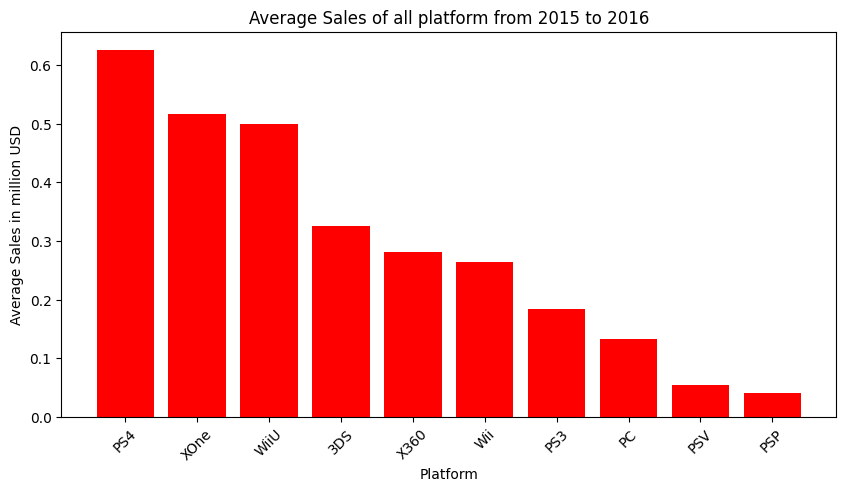

In [136]:
plt.figure(figsize=(10,5))
plt.bar(data_6.index, data_6['total_sales'], color='red')
plt.xlabel('Platform')
plt.ylabel('Average Sales in million USD')
plt.title('Average Sales of all platform from 2015 to 2016')
plt.xticks(data_6.index, data_6['platform'], rotation=45)
plt.show()

Insight

1. The boxplot shows that on average the total sales of games in all platform are likely the same, but as we can see the sales PS4, Xbox One, 3DS, and WiiU are relatively vary and tend to sell higher at some cases.
2. The average sales of all platforms observed in time of 2015 to 2016 shows that PS4, Xbox One, and WiiU are at higher top. Therefore the sales division should focus on these platforms for the year of 2017.

### **Create a scatter plot and calculate the correlation between reviews and sales**

Investigate how user and professional reviews impact sales on a popular platform. Create a scatter plot and calculate the correlation between reviews and sales. Then, draw conclusions.



In [137]:
main_data.columns

Index(['index', 'name', 'platform', 'year_of_release', 'genre', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score',
       'rating', 'total_sales'],
      dtype='object')

In [138]:
main_data['critic_score'].unique()

array([ 0, 82, 85, 87, 93, 86, 84, 77, 81, 88, 92, 80, 76, 83, 66, 78, 89,
       73, 90, 74, 68, 63, 71, 79, 91, 69, 96, 70, 95, 65, 64, 67, 72, 75,
       62, 61, 58, 46, 48, 60, 59, 32, 57, 49, 45, 39, 19, 54, 44, 20, 43,
       42, 25, 35, 52, 55, 31, 56, 53, 51])

In [139]:
main_data['user_score'].unique()

array([nan, 4.3, 5. , 6.5, 7.9, 8.1, 6.4, 3.4, 8.5, 6.2, 8.4, 9.2, 7.6,
       6.7, 7. , 8.2, 6.8, 7.5, 4.4, 5.9, 8.7, 6.9, 7.7, 3.2, 5.5, 8.6,
       3.1, 6.1, 9. , 6.3, 7.3, 6. , 5.1, 4.9, 6.6, 4.5, 8.8, 2.9, 8. ,
       7.8, 5.4, 7.4, 5.2, 5.6, 7.1, 8.9, 4.6, 3.3, 9.3, 7.2, 5.7, 8.3,
       3.7, 5.3, 5.8, 1.7, 4.2, 3.8, 4.7, 4.1, 4. , 1.5, 0.7, 4.8, 3. ,
       2.5, 2. , 2.1, 0.2, 2.8, 1.9, 3.5, 3.6, 1.6, 2.4, 2.3, 1.4])

In [140]:
main_data['user_score'] = main_data['user_score'].fillna(0)

In [141]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            1108 non-null   int64  
 1   name             1108 non-null   object 
 2   platform         1108 non-null   object 
 3   year_of_release  1108 non-null   int64  
 4   genre            1108 non-null   object 
 5   na_sales         1108 non-null   float64
 6   eu_sales         1108 non-null   float64
 7   jp_sales         1108 non-null   float64
 8   other_sales      1108 non-null   float64
 9   critic_score     1108 non-null   int64  
 10  user_score       1108 non-null   float64
 11  rating           1108 non-null   object 
 12  total_sales      1108 non-null   float64
dtypes: float64(6), int64(3), object(4)
memory usage: 112.7+ KB


#### **PS4**

In [142]:
data_7 = main_data.groupby(['platform', 'name']).agg(
    critic_score=('critic_score', 'sum'),
    user_score=('user_score', 'sum'),
    total_sales=('total_sales', 'sum')
).query('platform == "PS4" & critic_score > 0 & user_score > 0').reset_index()

In [143]:
data_7

,platform,name,critic_score,user_score,total_sales
0,PS4,7 Days to Die,45,5.9,0.14
1,PS4,Aegis of Earth: Protonovus Assault,57,7.8,0.02
2,PS4,Agatha Christie's The ABC Murders,67,6.2,0.02
3,PS4,Anima - Gate of Memories,52,7.9,0.02
4,PS4,Arslan: The Warriors of Legend,69,6.6,0.09
...,...,...,...,...,...
177,PS4,Wolfenstein: The Old Blood,76,8.0,0.43
178,PS4,World of Final Fantasy,77,8.3,0.34
179,PS4,Worms: WMD,78,7.6,0.03
180,PS4,XCOM 2,88,8.0,0.14


Correlations

In [147]:
correlation_matrix = data_7[['critic_score', 'user_score', 'total_sales']].corr()
total_sales_correlation = correlation_matrix['total_sales']
total_sales_correlation

critic_score    0.392074
user_score     -0.064368
total_sales     1.000000
Name: total_sales, dtype: float64

<Axes: >

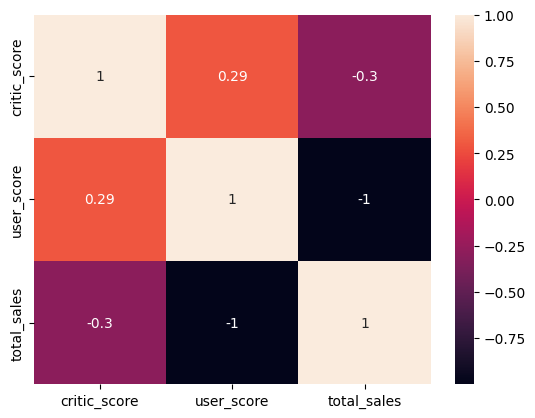

In [150]:
sns.heatmap(correlation_matrix.corr(), annot=True)

Scatter Plot

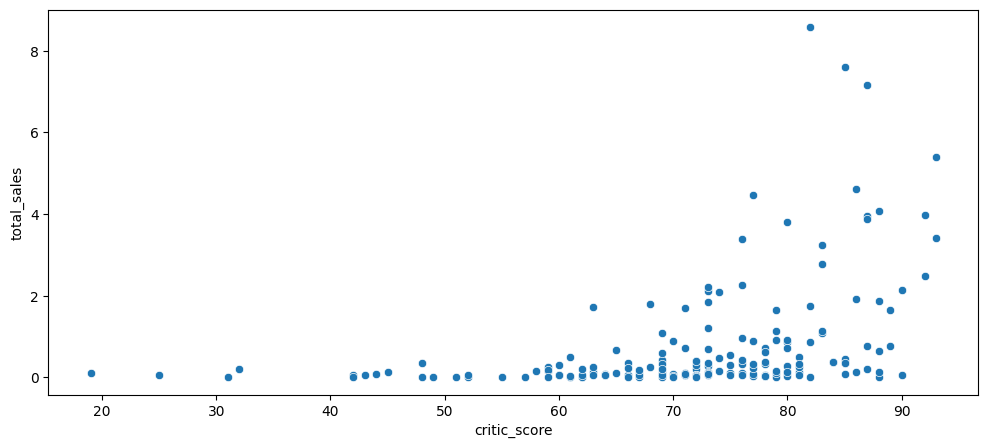

In [151]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='critic_score', y='total_sales', data=data_7);

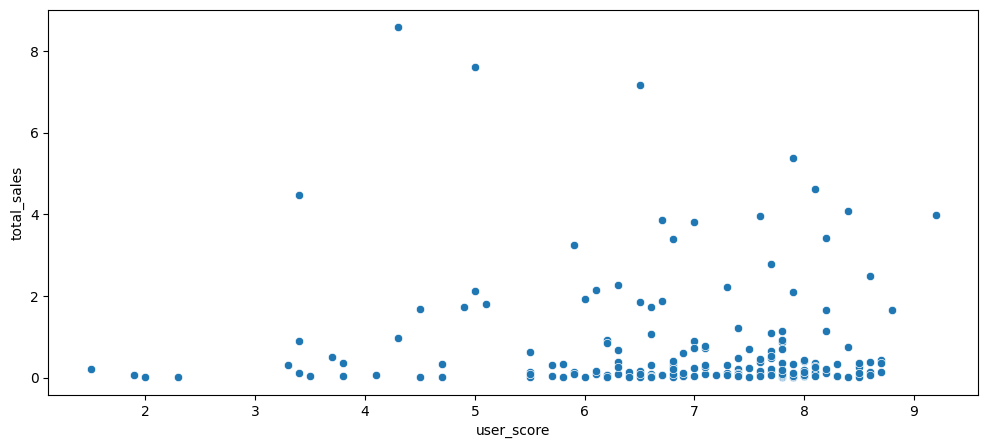

In [152]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='user_score', y='total_sales', data=data_7);

#### **3DS**

In [153]:
data_8 = main_data.groupby(['platform', 'name']).agg(
    critic_score=('critic_score', 'sum'),
    user_score=('user_score', 'sum'),
    total_sales=('total_sales', 'sum')
).query('platform == "3DS" & critic_score > 0 & user_score > 0').reset_index()

In [154]:
data_8.head(2)

,platform,name,critic_score,user_score,total_sales
0,3DS,7th Dragon III Code: VFD,77,8.2,0.16
1,3DS,Animal Crossing: Happy Home Designer,66,6.9,3.05


Correlations

In [156]:
correlation_matrix_3ds = data_8[['critic_score', 'user_score', 'total_sales']].corr()
total_sales_correlation_3ds = correlation_matrix_3ds['total_sales']
total_sales_correlation_3ds

critic_score    0.177575
user_score      0.240477
total_sales     1.000000
Name: total_sales, dtype: float64

<Axes: >

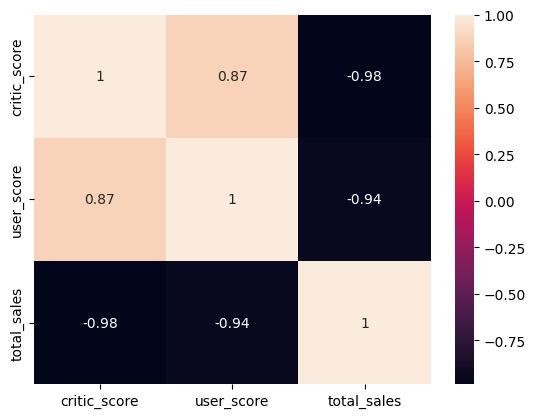

In [157]:
sns.heatmap(correlation_matrix_3ds.corr(), annot=True)

Scatter Plot

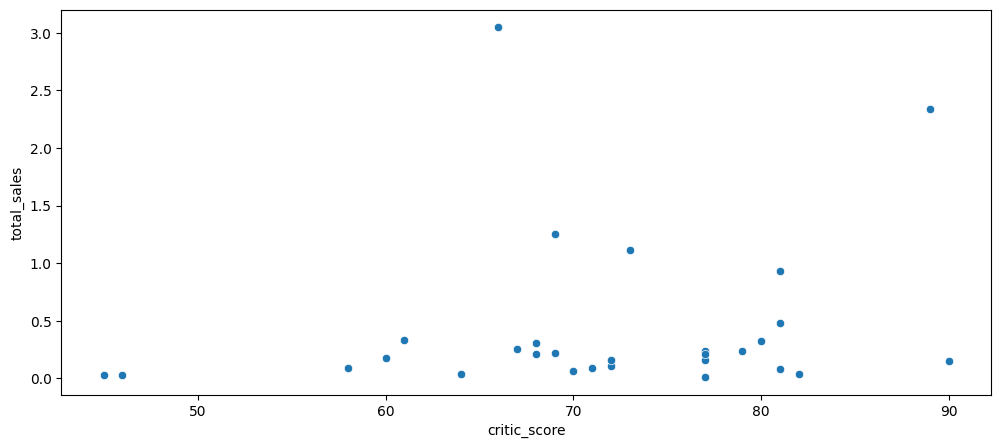

In [158]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='critic_score', y='total_sales', data=data_8);

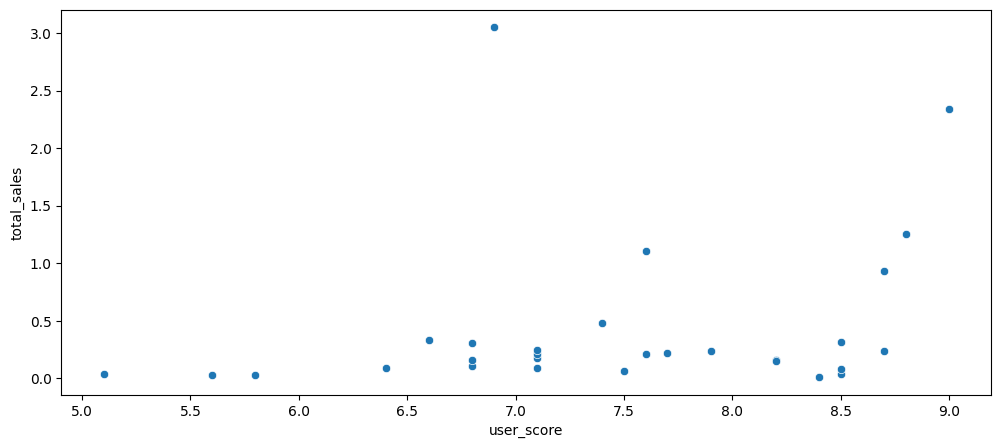

In [159]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='user_score', y='total_sales', data=data_8);

Insight

1. Here are the correlation calculation of PS4 between user review, critic review and total sales.

- critic_score :   0.392074
- user_score   :  -0.064368
- total_sales  :   1.000000
- Surprisingly, the correlations show the negative value between user score and total sales.

2. Both scatter plot of user review vs total sales and critic review vs total sales show the align statement that most of the PS4 are in Quadrant 4 which is even the score is high the total sales is not high as well.

3. Here are the correlation calculation of 3DS between user review, critic review and total sales.

- critic_score :   0.177575
- user_score   :   0.240477
- total_sales  :   1.000000
- The correlations are tend to have low correlation.

4. Same with PS4, most of the dots are in Quadrant 4 even though we can still see for some sales that high critic review and user review also has high selling number.

### **Observe the general distribution of games based on genre**

Observe the general distribution of games based on genre. What conclusions can we draw regarding the most profitable genres?

In [160]:
data_9 = pd.pivot_table(main_data, index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index()
data_9


,genre,total_sales
0,Shooter,105.73
1,Action,102.13
2,Sports,64.33
3,Role-Playing,55.82
4,Misc,14.17
5,Fighting,12.37
6,Adventure,11.98
7,Racing,10.86
8,Platform,9.28
9,Simulation,7.55


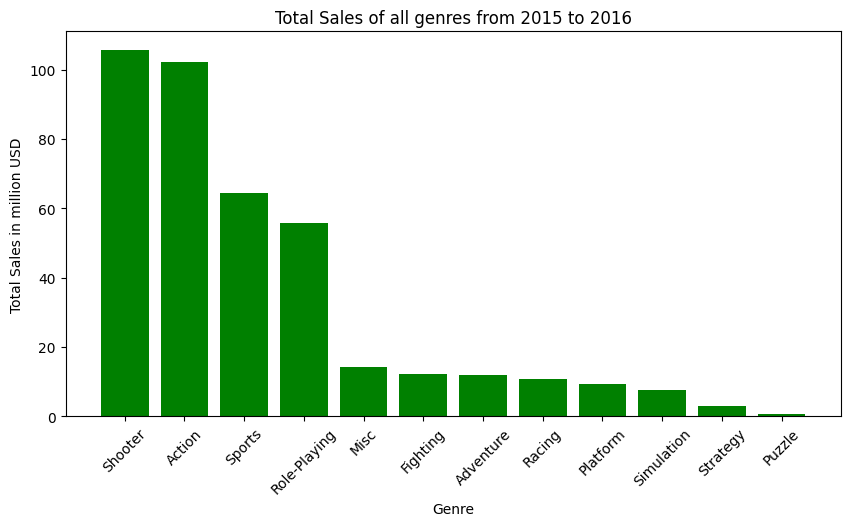

In [161]:
plt.figure(figsize=(10,5))
plt.bar(data_9.index, data_9['total_sales'], color='green')
plt.xlabel('Genre')
plt.ylabel('Total Sales in million USD')
plt.title('Total Sales of all genres from 2015 to 2016')
plt.xticks(data_9.index, data_9['genre'], rotation=45)
plt.show()

Insight

Based on the calculation of all region, the top 3 sales for genre are shooter, action, and sports

### **User profiling for each region**

#### **Best selling platform in each region**

In [162]:
main_data.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0.0,Unknown,14.63
1,77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
2,87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,0,0.0,Unknown,7.98
3,94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
4,99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,0,0.0,Unknown,7.39


In [163]:
data_10 = pd.pivot_table(main_data, index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').reset_index()
data_10.sort_values(by='eu_sales', ascending=False)

,platform,eu_sales,jp_sales,na_sales
3,PS4,83.54,12.05,63.86
9,XOne,28.10,0.18,50.30
1,PC,9.10,0.00,3.72
0,3DS,7.39,23.55,10.31
2,PS3,7.30,4.97,5.66
7,WiiU,6.49,4.12,8.86
8,X360,4.21,0.00,8.05
5,PSV,1.08,8.41,0.54
6,Wii,0.73,0.00,0.49
4,PSP,0.00,0.12,0.00


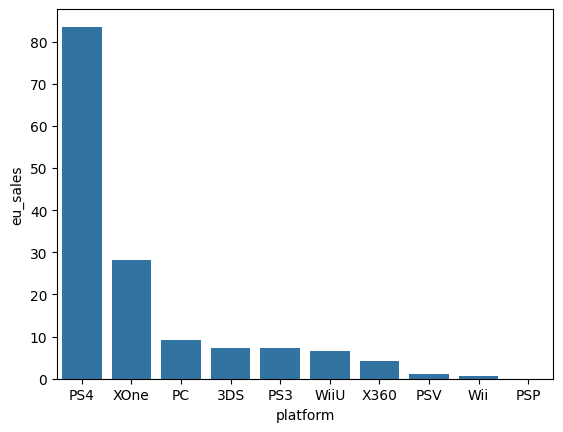

In [164]:
sns.barplot(data=data_10.sort_values(by='eu_sales', ascending=False), x='platform', y='eu_sales');

In [165]:
data_10.sort_values(by='jp_sales', ascending=False)

,platform,eu_sales,jp_sales,na_sales
0,3DS,7.39,23.55,10.31
3,PS4,83.54,12.05,63.86
5,PSV,1.08,8.41,0.54
2,PS3,7.30,4.97,5.66
7,WiiU,6.49,4.12,8.86
9,XOne,28.10,0.18,50.30
4,PSP,0.00,0.12,0.00
1,PC,9.10,0.00,3.72
6,Wii,0.73,0.00,0.49
8,X360,4.21,0.00,8.05


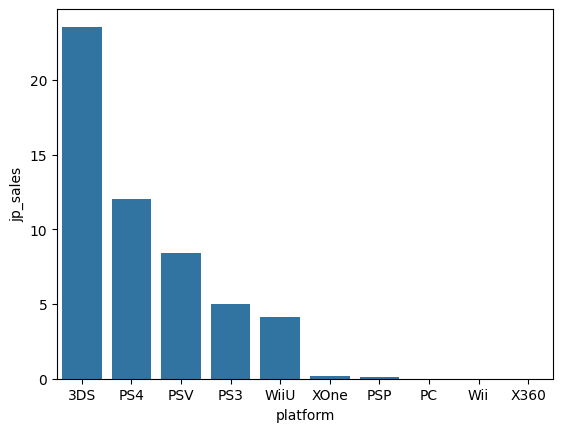

In [166]:
sns.barplot(data=data_10.sort_values(by='jp_sales', ascending=False), x='platform', y='jp_sales');

In [167]:
data_10.sort_values(by='na_sales', ascending=False)

,platform,eu_sales,jp_sales,na_sales
3,PS4,83.54,12.05,63.86
9,XOne,28.10,0.18,50.30
0,3DS,7.39,23.55,10.31
7,WiiU,6.49,4.12,8.86
8,X360,4.21,0.00,8.05
2,PS3,7.30,4.97,5.66
1,PC,9.10,0.00,3.72
5,PSV,1.08,8.41,0.54
6,Wii,0.73,0.00,0.49
4,PSP,0.00,0.12,0.00


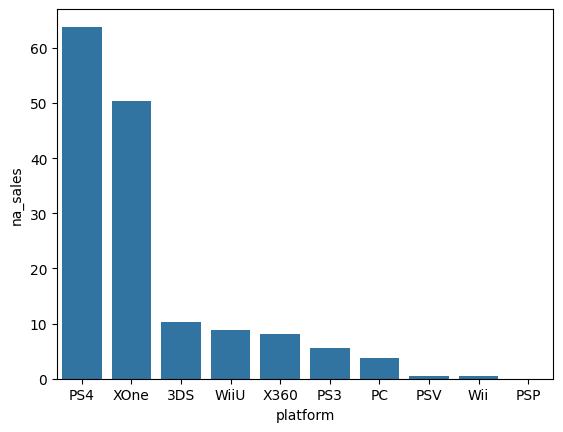

In [168]:
sns.barplot(data=data_10.sort_values(by='na_sales', ascending=False), x='platform', y='na_sales');

<Axes: xlabel='platform'>

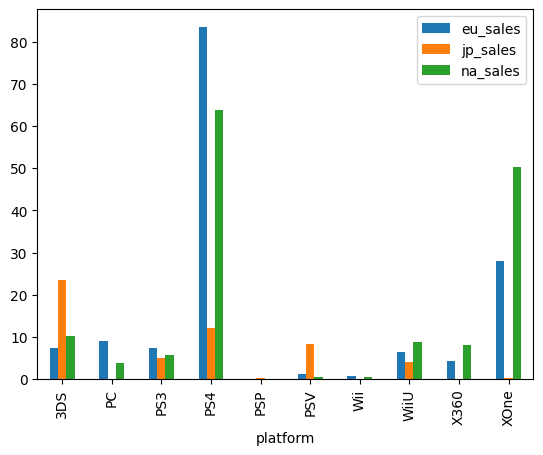

In [169]:
data_10.plot(x='platform', kind='bar')

Insight

Based on the calculation, the top 3 platform games in each regions are:
    
1. European Union  : PS4, Xbox One, PC
2. Japan           : 3DS, PS4, PSV
3. North America   : PS4, Xbox One, 3DS

#### **Top 5 best selling genre**

In [170]:
main_data.head(2)

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0.0,Unknown,14.63
1,77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58


In [171]:
data_11 = pd.pivot_table(main_data, index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').reset_index()
data_11

,genre,eu_sales,jp_sales,na_sales
0,Action,34.82,23.05,33.68
1,Adventure,4.67,2.22,3.84
2,Fighting,3.72,1.54,5.54
3,Misc,4.26,3.19,5.58
4,Platform,3.20,1.42,3.78
5,Puzzle,0.13,0.52,0.06
6,Racing,6.52,0.29,2.82
7,Role-Playing,17.21,13.41,19.82
8,Shooter,40.28,3.79,48.18
9,Simulation,3.74,1.93,1.36


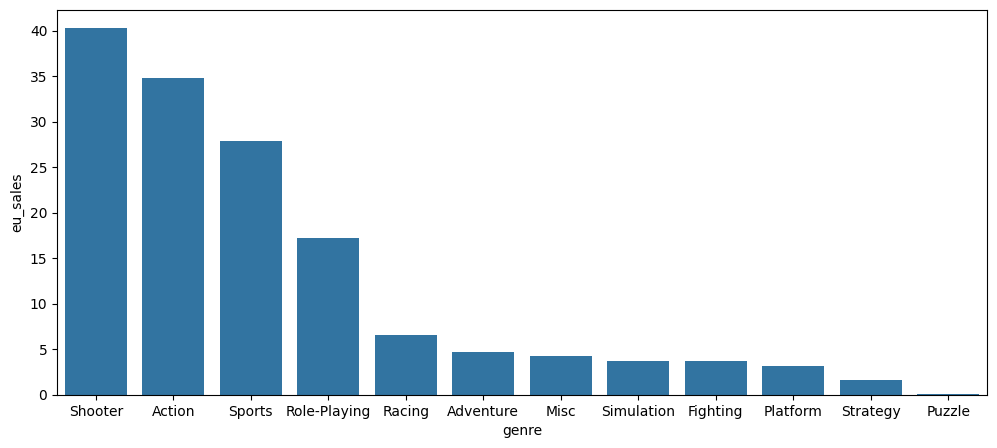

In [172]:
plt.figure(figsize=(12,5))
sns.barplot(data=data_11.sort_values(by='eu_sales', ascending=False), x='genre', y='eu_sales');

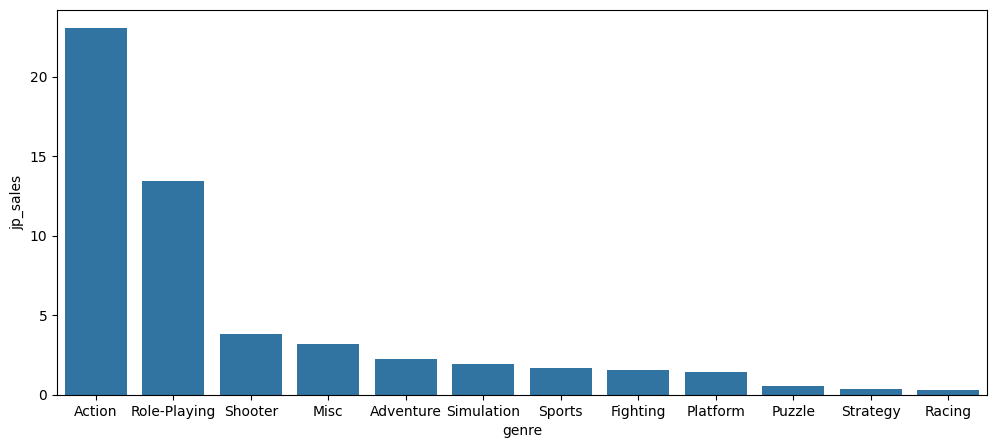

In [173]:
plt.figure(figsize=(12,5))
sns.barplot(data=data_11.sort_values(by='jp_sales', ascending=False), x='genre', y='jp_sales');

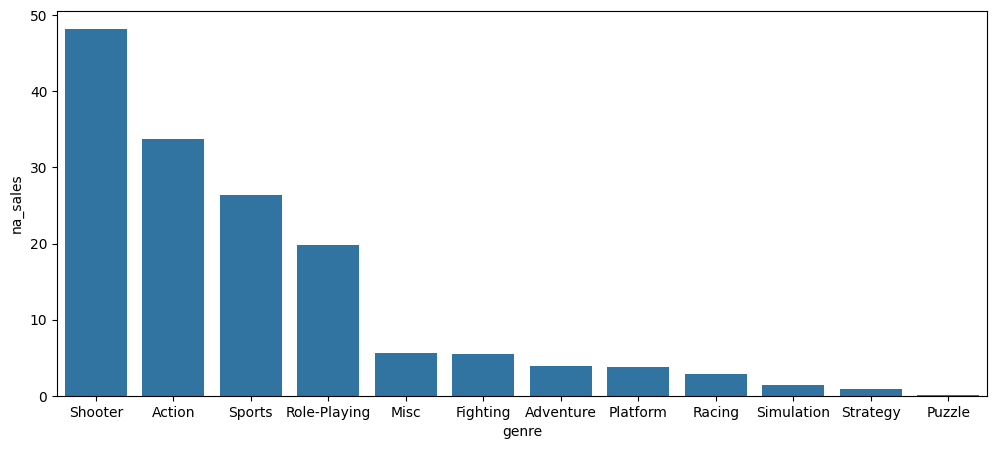

In [175]:
plt.figure(figsize=(12,5))
sns.barplot(data=data_11.sort_values(by='na_sales', ascending=False), x='genre', y='na_sales');

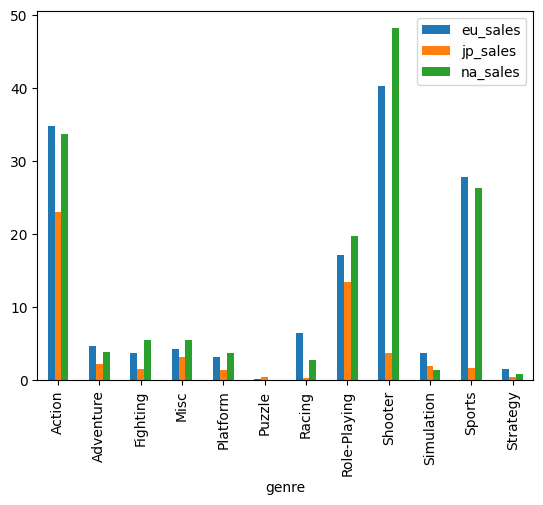

In [176]:
data_11.plot(x='genre', kind='bar');

Insight

Based on the analysis, here are the top 3 genres in each regions:

1. European Union : Shooter, Action, Sports
2. Japan          : Action, Role-Playing, Shooter
3. North America  : Shooter, Action, Sports

#### **ESRB Rating impact on sales in each region**

The Entertainment Software Rating Board (ESRB) is a self-regulatory organization that assigns age and content ratings to consumer video games in the United States and Canada.

ESRB Chart definition:

1. E - Everyone : Games with this rating contain content that that the ESRB believes is suitable for all ages.
2. E10+ - Everyone 10+ : Games with this rating contain content that the ESRB believes is suitable for ages 10 and over, including cartoon, fantasy, or mild violence, mild language, and/or minimal suggestive themes.
3. M - Mature 17+ : Games with this rating contain content that the ESRB believes is suitable for ages 17 and over, including intense violence, blood and gore, sexual content, strong language, drug use, nudity, and/or crude humor.
4. T - Teen : Games with this rating contain content that the ESRB believes is suitable for ages 13 and over, including violence, suggestive themes, crude humor, minimal blood, and/or infrequent use of strong language.

In [177]:
main_data.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0.0,Unknown,14.63
1,77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
2,87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,0,0.0,Unknown,7.98
3,94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
4,99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,0,0.0,Unknown,7.39


In [178]:
main_data['rating'].unique()

array(['Unknown', 'E', 'M', 'T', 'E10+'], dtype=object)

In [179]:
data_12 = main_data.loc[main_data['rating'] != 'Unknown']

In [180]:
data_12['rating'].unique()

array(['E', 'M', 'T', 'E10+'], dtype=object)

In [181]:
data_13 = pd.pivot_table(data_12, index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').reset_index()
data_13

,rating,eu_sales,jp_sales,na_sales
0,E,34.83,5.25,26.59
1,E10+,11.54,3.27,17.87
2,M,45.54,4.29,47.03
3,T,20.32,7.70,22.86


In [182]:
data_13.sort_values(by='eu_sales', ascending=False)

,rating,eu_sales,jp_sales,na_sales
2,M,45.54,4.29,47.03
0,E,34.83,5.25,26.59
3,T,20.32,7.70,22.86
1,E10+,11.54,3.27,17.87


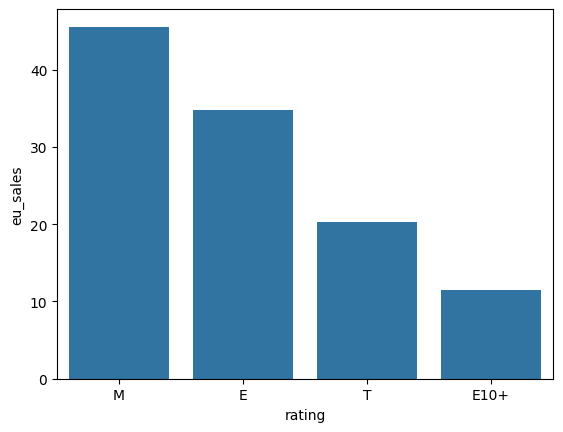

In [183]:
sns.barplot(data=data_13.sort_values(by='eu_sales', ascending=False), x='rating', y='eu_sales');

In [184]:
data_13.sort_values(by='jp_sales', ascending=False)

,rating,eu_sales,jp_sales,na_sales
3,T,20.32,7.70,22.86
0,E,34.83,5.25,26.59
2,M,45.54,4.29,47.03
1,E10+,11.54,3.27,17.87


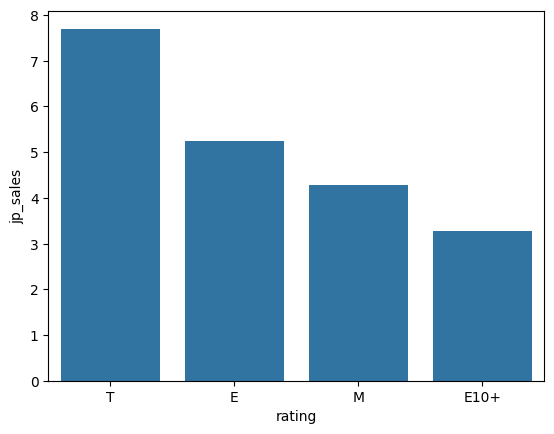

In [185]:
sns.barplot(data=data_13.sort_values(by='jp_sales', ascending=False), x='rating', y='jp_sales');

In [186]:
data_13.sort_values(by='na_sales', ascending=False)

,rating,eu_sales,jp_sales,na_sales
2,M,45.54,4.29,47.03
0,E,34.83,5.25,26.59
3,T,20.32,7.70,22.86
1,E10+,11.54,3.27,17.87


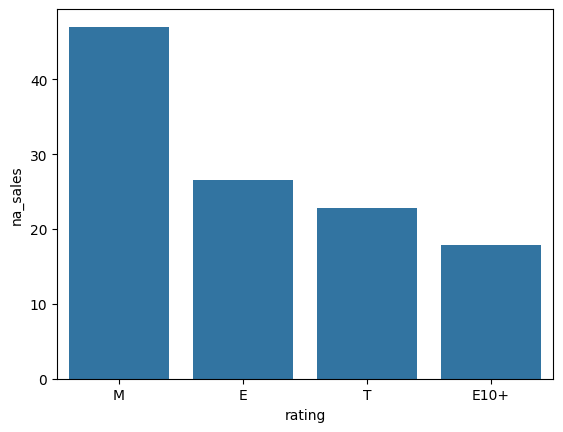

In [187]:
sns.barplot(data=data_13.sort_values(by='na_sales', ascending=False), x='rating', y='na_sales');

Insight

Based on the analysis, the top ESRB rating in each region is:
    
1. European Union: Mature
2. Japan: Teen
3. North America: Mature

## **Testing Hyphothesis**

### **Hyphothesis 1**

1. H0: The average user rating of the Xbox One and PC platforms is the same.
2. H1: The average user rating of the Xbox One and PC platforms is not the same.
3. alpha : 0.05

In this test we will use method for one way and independent.

In [188]:
main_data['platform'].unique()

array(['PS4', 'XOne', '3DS', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

In [189]:
data_xbox = main_data.query('platform == "XOne" & user_score > 0').reset_index()
data_ps = main_data.query('platform == "PC" & user_score > 0').reset_index()

In [190]:
data_xbox.shape

(121, 14)

In [191]:
data_ps.shape

(84, 14)

In [192]:
np.var(data_xbox['user_score']), np.var(data_ps['user_score'])

(2.108223482002596, 3.0739158163265308)

In [193]:
alpha = 0.05

In [194]:
p_value_levene = stats.levene(data_xbox['user_score'], data_ps['user_score']).pvalue
print(p_value_levene)

if p_value_levene > alpha:
    print('H0 is accepted: The average user rating of the Xbox One and PC platforms is the same.')
else:
    print('H0 is rejected: The average user rating of the Xbox One and PC platforms is not the same.')
print('Xbox one average user rating is', data_xbox['user_score'].mean())
print('PS one average user rating is', data_ps['user_score'].mean())

0.07122249094391404
H0 is accepted: The average user rating of the Xbox One and PC platforms is the same.
Xbox one average user rating is 6.542148760330578
PS one average user rating is 6.29642857142857


In [195]:
p_value = stats.ttest_ind(data_xbox['user_score'], data_ps['user_score'], equal_var=False).pvalue
print(p_value)

if p_value > alpha:
    print('H0 is accepted: The average user rating of the Xbox One and PC platforms is the same.')
else:
    print('H0 is rejected: The average user rating of the Xbox One and PC platforms is not the same.')
print('Xbox one average user rating is', data_xbox['user_score'].mean())
print('PS one average user rating is', data_ps['user_score'].mean())

0.2946308864003345
H0 is accepted: The average user rating of the Xbox One and PC platforms is the same.
Xbox one average user rating is 6.542148760330578
PS one average user rating is 6.29642857142857


### **Hyphothesis 2**

1. H0: The average user rating of the Action and Sports genres is the same.
2. H1: The average user rating of the Action and Sports genres is not different.
3. Alpha : 0.05

In this test we will use method for one way and independent.

In [196]:
main_data['genre'].unique()

array(['Shooter', 'Sports', 'Role-Playing', 'Action', 'Platform',
       'Simulation', 'Fighting', 'Racing', 'Adventure', 'Misc',
       'Strategy', 'Puzzle'], dtype=object)

In [197]:
data_action = main_data.query('genre == "Action" & user_score > 0').reset_index()
data_sports = main_data.query('genre == "Sports" & user_score > 0').reset_index()

In [198]:
data_action.shape

(193, 14)

In [199]:
data_sports.shape

(82, 14)

In [200]:
np.var(data_action['user_score']), np.var(data_sports['user_score'])

(1.8036618432709604, 3.8252424152290296)

In [201]:
p_value_levene = stats.levene(data_action['user_score'], data_sports['user_score']).pvalue
print(p_value_levene)

if p_value_levene > alpha:
    print('H0 is accepted: The average user rating of the Action and Sports genres is different.')
else:
    print('H0 is rejected: The average user rating of the Action and Sports genres is not different.')
print('Action genre average user rating is', data_action['user_score'].mean())
print('Sports genre average user rating is', data_sports['user_score'].mean())

1.060035862066395e-05
H0 is rejected: The average user rating of the Action and Sports genres is not different.
Action genre average user rating is 6.808290155440415
Sports genre average user rating is 5.198780487804878


In [202]:
p_value = stats.ttest_ind(data_action['user_score'], data_sports['user_score'], equal_var=False).pvalue
print(p_value)

if p_value > alpha:
    print('H0 is accepted: The average user rating of the Action and Sports genres is different.')
else:
    print('H0 is rejected: The average user rating of the Action and Sports genres is not different.')
print('Action genre average user rating is', data_action['user_score'].mean())
print('Sports genre average user rating is', data_sports['user_score'].mean())

5.97163549920592e-10
H0 is rejected: The average user rating of the Action and Sports genres is not different.
Action genre average user rating is 6.808290155440415
Sports genre average user rating is 5.198780487804878


Insight

Based on the hyphothesis testing, the result are below:
    
1. Hyphothesis 1: The average user rating of the Xbox One and PC platforms is the same.

- p_value: 0.07122249094391404
- H0 is accepted: The average user rating of the Xbox One and PC platforms is the same.
- Xbox one average user rating is 6.542148760330578
- PS one average user rating is 6.29642857142857

2. Hyphothesis 2: The average user rating of the Action and Sports genres is different.

- p_value: 1.060035862066395e-05
- H0 is rejected: The average user rating of the Action and Sports genres is not different.
- Action genre average user rating is 6.808290155440415
- Sports genre average user rating is 5.198780487804878

## **Conclusion**

The project aims to assist the Ice company in understanding historical video game sales, enabling them to formulate an improved sales strategy for the year 2017.

1. Data Initiation

Based on data given, it is concluded:

- The data has 16715 rows and 11 columns.
- The name columns are in capital.
- There are two type of data that is not suitable. They are Year_of_Release and User_Score that should be in integer.
- Missing value has been found in column: Name, Genre, Year_of_Release, User_Score, Rating, and Critic_Score.
- There is no duplicate value.
From the findings above, several actions might be needed:

- Change the name of the columns into lower case format.
- Change the data type into its suitable type.
- Deal with missing value with suitable action.

2. Data Preparation

- All columns has been set into lower case.
- Data type has been set as below:

- name : object
- platform : object
- year_of_release : integer
- genre : object
- na_sales : float
- eu_sales : float
- jp_sales : float
- other_sales : float
- critic_score : integer
- user_score : float
- rating : object

- Missing value in column name and genre has been eliminated.
- Missing value in user_score still Nan 54%, this need further analysis.
- Missing value in rating score filled with "Unknown" value.
- Final data consist of 16713 rows and 11 columns.

4. Data Analyzing

- From calculation above, it shows that the peak of games released were at 2008 and 2009 period.
- Based on the calculation of PS2 as sample, the uphill trend of PS2 Sales started in 2001, peaked at 211 million USD in 2004 and steadily decline after that.
- The downfall trend in 2016 caused by incomplete data in 2016 because the year of 2016 is not over yet.
- Based on the line graph almost all of the platform selling performance are declining but PS4 and Xbox One.
- The boxplot shows that on average the total sales of games in all platform are likely the same, but as we can see the sales PS4, Xbox One, 3DS, and WiiU are relatively vary and tend to sell higher at some cases.
- The average sales of all platforms observed in time of 2015 to 2016 shows that PS4, Xbox One, and WiiU are at higher top. Therefore the sales division should focus on these platforms for the year of 2017.
Here are the correlation calculation of PS4 between user review, critic review and total sales.

- critic_score :   0.392074
- user_score   :  -0.064368
- total_sales  :   1.000000
- Surprisingly, the correlations show the negative value between user score and total sales.

Both scatter plot of user review vs total sales and critic review vs total sales show the align statement that most of the PS4 are in Quadrant 4 which is even the score is high the total sales is not high as well.

Here are the correlation calculation of 3DS between user review, critic review and total sales.

- critic_score :   0.177575
- user_score   :   0.240477
- total_sales  :   1.000000
- The correlations are tend to have low correlation.

- Same with PS4, most of the dots are in Quadrant 4 even though we can still see for some sales that high critic review and user review also has high selling number.
Based on the calculation of all region, the top 3 sales for genre are shooter, action, and sports
Based on the analysis, the top ESRB rating in each region is:

- European Union: Mature
- Japan: Teen
- North America: Mature

5. Hyphothesis Testing

Based on the hyphothesis testing, the result are below:

Hyphothesis 1: The average user rating of the Xbox One and PC platforms is the same.
- p_value: 0.07122249094391404
- H0 is accepted: The average user rating of the Xbox One and PC platforms is the same.
- Xbox one average user rating is 6.542148760330578
- PS one average user rating is 6.29642857142857

Hyphothesis 2: The average user rating of the Action and Sports genres is different.
- p_value: 1.060035862066395e-05
- H0 is rejected: The average user rating of the Action and Sports genres is not different.
- Action genre average user rating is 6.808290155440415
- Sports genre average user rating is 5.198780487804878

## **Recommendation**

Based on the analysis of this project, the recommendation are these below:
    
1. Sales division need to focus in selling PS4, Xbox One, 3DS, and WiiU globally.
2. European Union and North America region mostly have the same characteristic in sales, therefore the strategy could be the same for both region.
- The most popular game platform in EU and NA is PS4, meanwhile in JP is Nintendo 3DS.
- The rating that commonly found in EU and NA is Mature, but in JP is T.
- The most popular genre in EU and NA is shooting, but in JP is action.